In [2]:
import future
import numpy as np
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 6

Populating the interactive namespace from numpy and matplotlib


# Pandas

A Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

* A fast and efficient DataFrame object for data manipulation with integrated indexing;
* Tools for reading and writing CSV, **xls**, HDF5, etc.
* Handles *messy* data
* Easy selection based on (categorical) values


# Pandas - Dataframes 

In [58]:
import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips")
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Show `display` and show that `display` is default in jupyter

# Pandas - access data

In [4]:
print(tips.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [59]:
print(tips['day'].values)

[Sun, Sun, Sun, Sun, Sun, ..., Sat, Sat, Sat, Sat, Thur]
Length: 244
Categories (4, object): [Thur, Fri, Sat, Sun]


# Select data based on value

In [6]:
display(tips[tips['day']=='Sat']) 

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Pandas - access data

* Get all data for smokers
* Get all tips for smokers

# Pandas - accessing data

* You can combine multiple conditions: 
    * and: `df[(df['x']=='y')&(df['y']=='x')]`
    * or: `df[(df['x']=='y')|(df['y']=='x')]`
* Get the tips for all female guests that ate by themselves or with at least 5 people

In [ ]:
display(tips[...]) 

# Pandas - statistics

* You can compute the mean of a DataFrame with `df.mean`:

In [7]:
print(tips['tip'].mean())
print(tips.mean())

2.99827868852459
total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64


* Try out `df.std`, `df.var`, `df.min`, `df.sum` and explain the output

# Pandas - statistics

* You can apply the statistics on a selection of the data:
* Get mean and standard deviation of the tips for smokers that had dinner with at least 4 people

In [8]:
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# Pandas - group data

Statistical functions can be applied to grouped data

In [9]:
tips.groupby('time').mean()

,total_bill,tip,size
time,,,
Lunch,17.168676,2.728088,2.411765
Dinner,20.797159,3.102670,2.630682


Show how to use multiple columns and how to extract data from specific columns.

# Wide vs Long data

<img src="https://docs.datawatch.com/designer/tutorial/desktop/image531.gif"/>

* Long data: 
    * Every line is one observation
    * Each column has a unique meaning
* Easy to summarize, even with many replicates, time points, etc.
* Easy to select data automatically and hierarchically 

In [50]:
t = np.linspace(0,10,11)
timepoints = np.concatenate((t,t,t))
replicates = np.concatenate((np.ones(11),2*np.ones(11),3*np.ones(11)))
def growth(t,n0,r):
    return (n0*np.random.normal(1,.1))*np.exp(np.random.normal(1,.1)*r*t)

data = np.concatenate((growth(t,100,.5),growth(t,100,.5),growth(t,100,.5)))

df = pd.DataFrame({'time':timepoints,
                   'replicate':replicates,
                   'count':data})


# Pandas - long and wide data

In [51]:
display(df)
#df.pivot(columns='replicate',values='count',index='time')
#df.pivot(columns='time',values='count',index='replicate')

,time,replicate,count
0,0.0,1.0,104.337412
1,1.0,1.0,178.394384
2,2.0,1.0,305.015772
...,...,...,...
30,8.0,3.0,7668.886513
31,9.0,3.0,12930.938854
32,10.0,3.0,21803.579876


# Pandas - data I/O - read plain text

* Write dataframe to file: `df = pd.read_csv(fn)`

In [10]:
pd.read_csv('tips.csv')

,total_bill tip sex smoker day time size
0,16.99\t1.01\tFemale\tNo\tSun\tDinner\t2
1,10.34\t1.66\tMale\tNo\tSun\tDinner\t3
2,21.01\t3.5\tMale\tNo\tSun\tDinner\t3
...,...
241,22.67\t2.0\tMale\tYes\tSat\tDinner\t2
242,17.82\t1.75\tMale\tNo\tSat\tDinner\t2
243,18.78\t3.0\tFemale\tNo\tThur\tDinner\t2


In [11]:
!head tips.csv --lines=3

total_bill	tip	sex	smoker	day	time	size
16.99	1.01	Female	No	Sun	Dinner	2
10.34	1.66	Male	No	Sun	Dinner	3


Pandas expect the *separator* to be a `,`

# Pandas - data I/O - plain text output


In [12]:
tips.to_csv('tips_new.csv')
!head tips.csv --lines=3

total_bill	tip	sex	smoker	day	time	size
16.99	1.01	Female	No	Sun	Dinner	2
10.34	1.66	Male	No	Sun	Dinner	3


* Make output like this

```
total_bill	tip	sex	smoker	day	time	size
16.99	1.01	Female	No	Sun	Dinner	2
10.34	1.66	Male	No	Sun	Dinner	3
```

# Pandas - data I/O - read excel

* Sometimes, you get data in excel files
* Pandas has a function to read this: `pd.read_excel`

In [13]:
pd.read_excel('tips.xls')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# Plotting with DataFrames


1. Extract the data and plot with Matplotlib
2. Use Pandas plotting fuctionality
    - cumbersome and limited
2. Use Seaborn, which can use dataframes directly


# Plotting with matplotlib

Scatter plot is easy

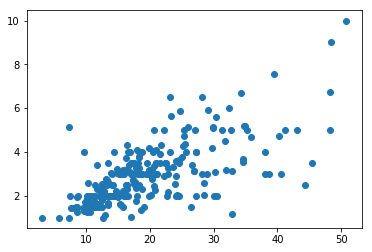

In [14]:
plt.scatter(tips['total_bill'],tips['tip'])

# Plotting with matplotlib

Bar chart gets complicated

<BarContainer object of 6 artists>

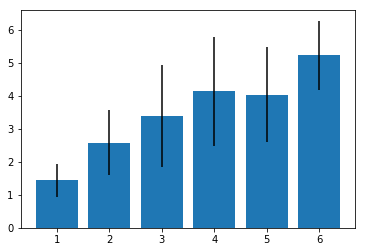

In [103]:
x = tips['size'].unique()
x.sort()
mu = np.zeros_like(x,dtype=np.float)
sd = np.zeros_like(x,dtype=np.float)
for i,s in enumerate(x):
    mu[i] = tips[tips['size']==s].mean()['tip']
    sd[i] = tips[tips['size']==s].std()['tip']
plt.bar(x,mu,yerr=sd)

# Plotting with matplotlib

A bit shorter

<BarContainer object of 6 artists>

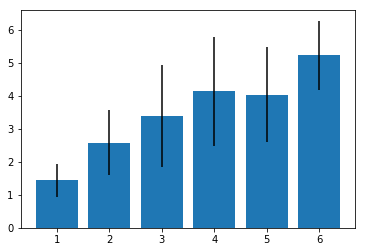

In [104]:
mu = tips.groupby('size').mean()['tip']
sd = tips.groupby('size').std()['tip']
plt.bar(mu.index,mu,yerr=sd)

# Plotting with Seaborn

Bar plot in one line, including annotation!

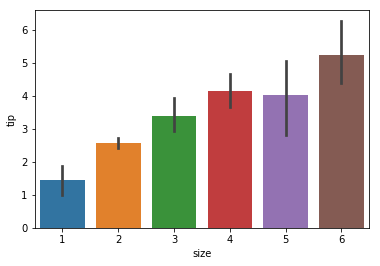

In [105]:
import seaborn as sns

sns.barplot(data=tips,x='size',y='tip');

An observant student noted that the errorbars differ from the previous plots. This is because these error bars are not the standard deviation but the 95% confidence interval!

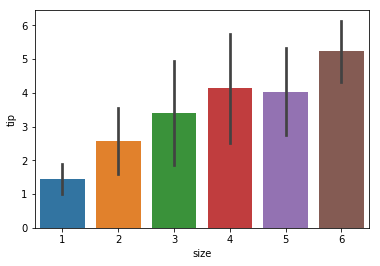

In [106]:
import seaborn as sns

sns.barplot(data=tips,x='size',y='tip',ci='sd');

# Plotting with Seaborn

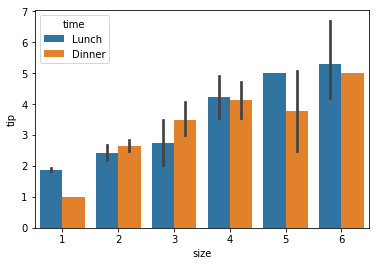

In [18]:
import seaborn as sns

sns.barplot(data=tips,x='size',y='tip',hue='time');

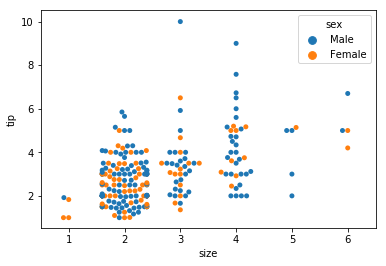

In [108]:
sns.swarmplot(data=tips,x='size',y='tip',hue='sex');

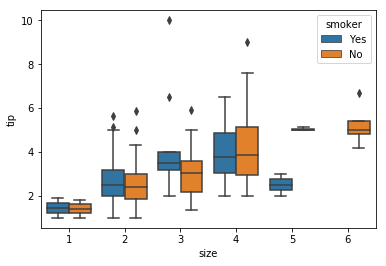

In [109]:
sns.boxplot(data=tips,x='size',y='tip',hue='smoker');

# Pandas - plotting with Seaborn


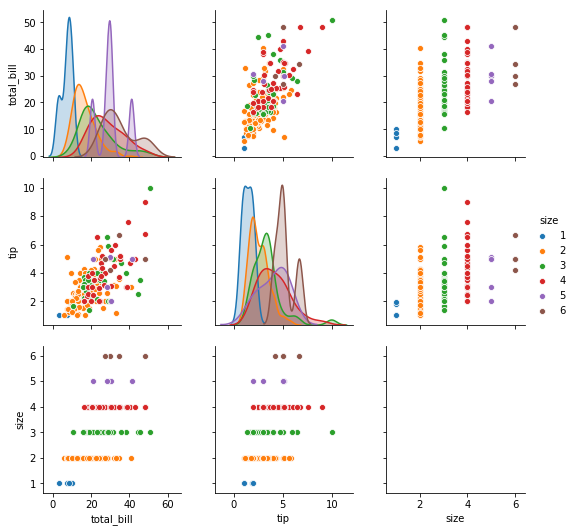

In [21]:
sns.pairplot(tips,hue='size')